<h3><b>1. INTRODUCTION</b></h3>

<p>In this project, the environment data from an IOT device in an office environment should be investigated. Office space is controlled by the amount of people in the office. Incoming data are date, carbon dioxide, light, temperature, humidity, humidity ratio and occupancy. There are three data sets in the documents. One of these data sets is the train set. Other data sets are test data sets. In this test data, the office room of the first test data is closed. The second test data room is open. Methods for such problems will be developed. Sci-kit library will be used when analyzing and modeling. Our aim here is to make sure that there are no people in the office. For this purpose, analysis of data will be done and machine learning algorithms will be used through both test and training data.</p>


<h3><b>2. INVESTIGATING THE DATA and EXPLORATORY DATA ANALYSIS</b></h3>
<p>First, I install all the libraries that I will use in our application. I install all the libraries in the first part because the algorithms I will use later and the analysis I will make more clearly will be done.Furthurmore, I have investigated the data, presented some visualization and analysed features. Let's write it. I will import necessary Python modules and read the data. </p>

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

<p>Our data appears to be attached in the file with the extension txt. We use pandas library to load all datasets. In this way, we see our data more regularly.So, Reading the data into Pandas DataFrames as train_data, test1_data and last one is test2_data.</p>

In [107]:
train_data=pd.read_csv('datatraining.txt')
test1_data=pd.read_csv('datatest.txt')
test2_data=pd.read_csv('datatest2.txt')

<p>Now, our data is loaded. We're writing the following snippet to see the loaded data. The purpose here is to see the top five of the loaded data.</p>

In [108]:
print('Train Data First 5 Rows Show\n',train_data.head(5))

Train Data First 5 Rows Show
                   date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
5  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
1          1  
2          1  
3          1  
4          1  
5          1  


In [4]:
print('Train Data Last 5 Rows Show\n',train_data.tail(5))

Train Data Last 5 Rows Show
                      date  Temperature  Humidity  Light         CO2  \
8139  2015-02-10 09:29:00        21.05   36.0975  433.0  787.250000   
8140  2015-02-10 09:29:59        21.05   35.9950  433.0  789.500000   
8141  2015-02-10 09:30:59        21.10   36.0950  433.0  798.500000   
8142  2015-02-10 09:32:00        21.10   36.2600  433.0  820.333333   
8143  2015-02-10 09:33:00        21.10   36.2000  447.0  821.000000   

      HumidityRatio  Occupancy  
8139       0.005579          1  
8140       0.005563          1  
8141       0.005596          1  
8142       0.005621          1  
8143       0.005612          1  


In [5]:
print('Test1 Data First 5 Rows Show\n',test1_data.head(5))

Test1 Data First 5 Rows Show
                     date  Temperature  Humidity       Light         CO2  \
140  2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000   
141  2015-02-02 14:19:59      23.7180    26.290  578.400000  760.400000   
142  2015-02-02 14:21:00      23.7300    26.230  572.666667  769.666667   
143  2015-02-02 14:22:00      23.7225    26.125  493.750000  774.750000   
144  2015-02-02 14:23:00      23.7540    26.200  488.600000  779.000000   

     HumidityRatio  Occupancy  
140       0.004764          1  
141       0.004773          1  
142       0.004765          1  
143       0.004744          1  
144       0.004767          1  


<p>Then, we are loading the last five data. The purpose here is whether the data are written regularly. We do this for all data.</p>

In [6]:
print('Test1 Data Last 5 Rows Show\n',test1_data.tail(5))

Test1 Data Last 5 Rows Show
                      date  Temperature   Humidity  Light      CO2  \
2800  2015-02-04 10:38:59    24.290000  25.700000  808.0  1150.25   
2801  2015-02-04 10:40:00    24.330000  25.736000  809.8  1129.20   
2802  2015-02-04 10:40:59    24.330000  25.700000  817.0  1125.80   
2803  2015-02-04 10:41:59    24.356667  25.700000  813.0  1123.00   
2804  2015-02-04 10:43:00    24.408333  25.681667  798.0  1124.00   

      HumidityRatio  Occupancy  
2800       0.004829          1  
2801       0.004848          1  
2802       0.004841          1  
2803       0.004849          1  
2804       0.004860          1  


In [7]:
print('Test2 Data First 5 Rows Show\n',test2_data.tail(5))

Test2 Data First 5 Rows Show
                      date  Temperature  Humidity   Light      CO2  \
9748  2015-02-18 09:15:00       20.815   27.7175  429.75  1505.25   
9749  2015-02-18 09:16:00       20.865   27.7450  423.50  1514.50   
9750  2015-02-18 09:16:59       20.890   27.7450  423.50  1521.50   
9751  2015-02-18 09:17:59       20.890   28.0225  418.75  1632.00   
9752  2015-02-18 09:19:00       21.000   28.1000  409.00  1864.00   

      HumidityRatio  Occupancy  
9748       0.004213          1  
9749       0.004230          1  
9750       0.004237          1  
9751       0.004279          1  
9752       0.004321          1  


In [8]:
print('Test2 Data Last 5 Rows Show\n',test2_data.tail(5))

Test2 Data Last 5 Rows Show
                      date  Temperature  Humidity   Light      CO2  \
9748  2015-02-18 09:15:00       20.815   27.7175  429.75  1505.25   
9749  2015-02-18 09:16:00       20.865   27.7450  423.50  1514.50   
9750  2015-02-18 09:16:59       20.890   27.7450  423.50  1521.50   
9751  2015-02-18 09:17:59       20.890   28.0225  418.75  1632.00   
9752  2015-02-18 09:19:00       21.000   28.1000  409.00  1864.00   

      HumidityRatio  Occupancy  
9748       0.004213          1  
9749       0.004230          1  
9750       0.004237          1  
9751       0.004279          1  
9752       0.004321          1  


<p>After I get the main intuition, I am investigating further to see some analytical attributes</p>

In [9]:
print('Train Data Show Describe\n',train_data.describe())

Train Data Show Describe
        Temperature     Humidity        Light          CO2  HumidityRatio  \
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000   
mean     20.619084    25.731507   119.519375   606.546243       0.003863   
std       1.016916     5.531211   194.755805   314.320877       0.000852   
min      19.000000    16.745000     0.000000   412.750000       0.002674   
25%      19.700000    20.200000     0.000000   439.000000       0.003078   
50%      20.390000    26.222500     0.000000   453.500000       0.003801   
75%      21.390000    30.533333   256.375000   638.833333       0.004352   
max      23.180000    39.117500  1546.333333  2028.500000       0.006476   

         Occupancy  
count  8143.000000  
mean      0.212330  
std       0.408982  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


In [10]:
print('Test1 Data Show Describe\n',test1_data.describe())

Test1 Data Show Describe
        Temperature     Humidity        Light          CO2  HumidityRatio  \
count  2665.000000  2665.000000  2665.000000  2665.000000    2665.000000   
mean     21.433876    25.353937   193.227556   717.906470       0.004027   
std       1.028024     2.436842   250.210906   292.681718       0.000611   
min      20.200000    22.100000     0.000000   427.500000       0.003303   
25%      20.650000    23.260000     0.000000   466.000000       0.003529   
50%      20.890000    25.000000     0.000000   580.500000       0.003815   
75%      22.356667    26.856667   442.500000   956.333333       0.004532   
max      24.408333    31.472500  1697.250000  1402.250000       0.005378   

         Occupancy  
count  2665.000000  
mean      0.364728  
std       0.481444  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  


In [11]:
print('Test2 Data Show Describe\n',test2_data.describe())

Test2 Data Show Describe
        Temperature     Humidity        Light          CO2  HumidityRatio  \
count  9752.000000  9752.000000  9752.000000  9752.000000    9752.000000   
mean     21.001768    29.891910   123.067930   753.224832       0.004589   
std       1.020693     3.952844   208.221275   297.096114       0.000531   
min      19.500000    21.865000     0.000000   484.666667       0.003275   
25%      20.290000    26.642083     0.000000   542.312500       0.004196   
50%      20.790000    30.200000     0.000000   639.000000       0.004593   
75%      21.533333    32.700000   208.250000   831.125000       0.004998   
max      24.390000    39.500000  1581.000000  2076.500000       0.005769   

         Occupancy  
count  9752.000000  
mean      0.210111  
std       0.407408  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


<p>Then, the data has what informations. We are learning the information for all data</p>

In [12]:
print('Train Data Show Info\n')
print(train_data.info())

Train Data Show Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 477.1+ KB
None


In [13]:
print('Test1 Data Show Info\n')
print(test1_data.info())

Test1 Data Show Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
date             2665 non-null object
Temperature      2665 non-null float64
Humidity         2665 non-null float64
Light            2665 non-null float64
CO2              2665 non-null float64
HumidityRatio    2665 non-null float64
Occupancy        2665 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 156.2+ KB
None


In [14]:
print('Test2 Data Show Info\n')
print(test2_data.info())

Test2 Data Show Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
date             9752 non-null object
Temperature      9752 non-null float64
Humidity         9752 non-null float64
Light            9752 non-null float64
CO2              9752 non-null float64
HumidityRatio    9752 non-null float64
Occupancy        9752 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 571.4+ KB
None


<p>We will list all the columns for all data. We check all columns. Is there any spelling mistake?</p>

In [15]:
print('Train Data Show Columns\n',train_data.columns)

Train Data Show Columns
 Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')


In [16]:
print('Test1 Data Show Columns\n',test1_data.columns)

Test1 Data Show Columns
 Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')


In [17]:
print('Test2 Data Show Columns\n',test2_data.columns)

Test2 Data Show Columns
 Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')


<p>And, how many rows and columns are there for all data?</p>

In [18]:
print('Train Data Shape Show \n',train_data.shape)

Train Data Shape Show 
 (8143, 7)


In [19]:
print('Test1 Data Shape Show \n',test1_data.shape)

Test1 Data Shape Show 
 (2665, 7)


In [20]:
print('Test2 Data Shape Show \n',test2_data.shape)

Test2 Data Shape Show 
 (9752, 7)


<p>Now, I'm gonna to fix some data. Data is date. Because,it seems the data set has an unnamed id column which mismatches with date. This create some problems. I will delete it for making header and the data fitting each other. Furthuremore,
When you look into the test data sets, the quotation marks in the date sections appear to be missing. Firstly, I will first column. Column is date. "date" replaced "Date" for each other. For every other line I will remove the characters before the first comma. I will do it for all three of the files. For the second test set, I will surround Date column with quotation marks too.</p>

In [109]:
lines_train=[]
with open('datatraining.txt','r') as f:
    lines_train=f.readlines()
    
new_lines_train_data=[]
new_lines_train_data.append(lines_train[0].replace('date','Date'))

for line in lines_train[1:]:
    new_lines_train_data.append(','.join(l for l in line.split(',')[1:]))

with open('train.csv','w') as f:
    f.writelines(new_lines_train_data)
####################################################################################    
test1_data=[]
with open('datatest.txt','r') as f:
    test1_data=f.readlines()
    
lines_test1_data=[]
lines_test1_data.append(test1_data[0].replace('date','Date'))

for line in test1_data[1:]:
    lines_test1_data.append(','.join(l for l in line.split(',')[1:]))

with open('test1.csv','w') as f:
    f.writelines(lines_test1_data)
####################################################################################

lines_test2_data = []
with open('datatest2.txt', 'r') as function1:
    lines_test2_data = function1.readlines()
    
lines_test2_new_data = []
lines_test2_new_data.append(lines_test2_data[0].replace('date', 'Date'))

for line in lines_test2_data[1:]:
    i = line.index(',') + 1
    ii = line[i:].index(',')
    line = line[:i] + '"' + line[i:i+ii] + '"' + line[i+ii:]   
    lines_test2_new_data.append(','.join(l for l in line.split(',')[1:]))
    
with open('test2.csv', 'w') as function1:
    function1.writelines(lines_test2_new_data)  
    

<p>Then, I re-load all data as train_data,test1_data and test2_data</p>

In [110]:
train_data=pd.read_csv('train.csv')
test1_data=pd.read_csv('test1.csv')
test2_data=pd.read_csv('test2.csv')

In [23]:
train_data.head(5)

,Date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


<p>Now,I will check null on all data and If data has null, I will sum of null data's. In this way, how many missing data is in the data. </p>

In [24]:
print('Train Data Sum of Null\n',train_data.isnull().sum())

Train Data Sum of Null
 Date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


In [25]:
print('Test1 Data Sum of Null\n',test1_data.isnull().sum())

Test1 Data Sum of Null
 Date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


In [26]:
print('Test2 Data Sum of Null\n',test2_data.isnull().sum())

Test2 Data Sum of Null
 Date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


<p>We access the unique values of the date on the training data. In this way, we check that there are any data assigned at the same date.</p>

In [27]:
train_data['Date'].unique()

array(['2015-02-04 17:51:00', '2015-02-04 17:51:59',
       '2015-02-04 17:53:00', ..., '2015-02-10 09:30:59',
       '2015-02-10 09:32:00', '2015-02-10 09:33:00'], dtype=object)

<h3><b>2.1. One Visualization to Rule Them All</b></h3>
<p>We will perform analysis on the training data. The relationship between the features found in the training data is observed. In this way, comments about the properties can be made.</p>

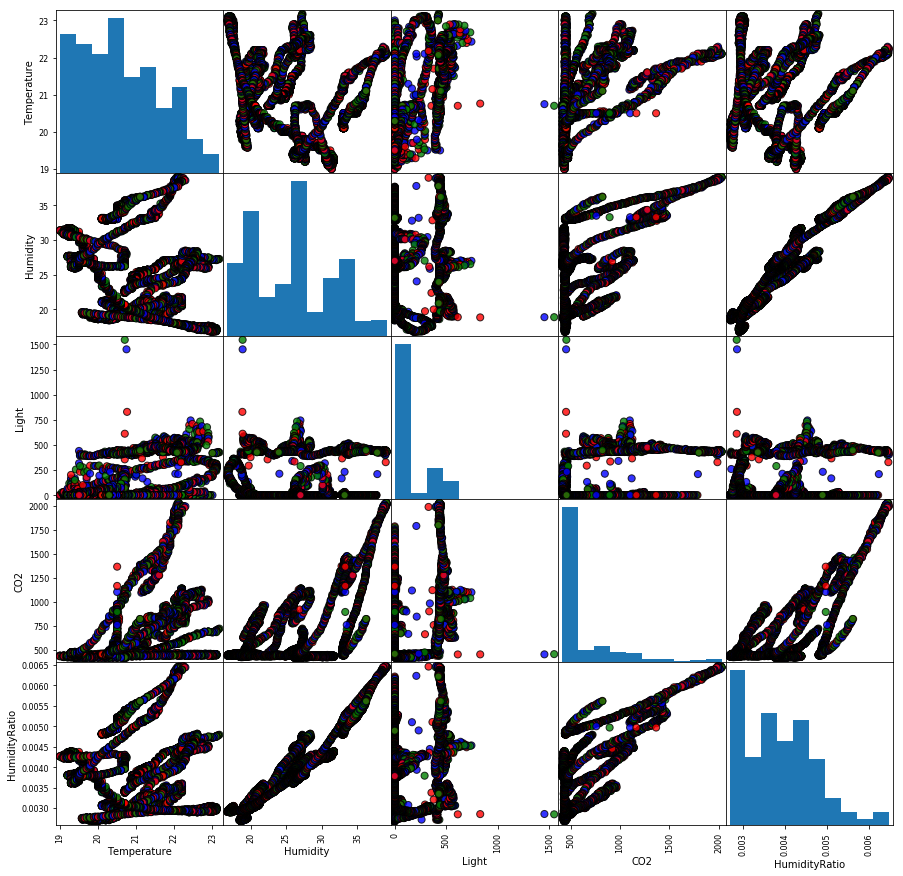

In [28]:
pd.plotting.scatter_matrix(train_data.loc[:, train_data.columns != 'Occupancy'],
                                       c=['green','blue','red'],
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.8,
                                       s = 200,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

<p>what I conclude from this scenery is that I need light. Humidity are high correlated.Also CO2 and humity ratio together are useless. Temperature with CO2 nor humidity too do npt do well. It seems that light with anythink will handle the situation. Now I want to see time seris of every feature. To do so, I need to convert date strings to Python datetime objects. This function should be handly. </p>

<h3><b>2.2. Analysing Occupancy</b></h3>
<p>There are different data defined in the "occupancy" section of the training data. I will show it on Seaborn library. How many data are available?</p>

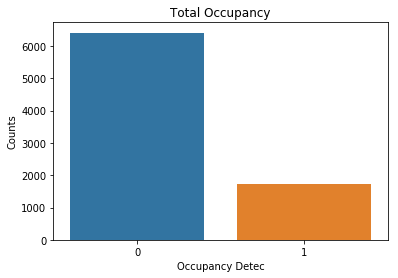

In [29]:
train_data['Occupancy'].unique()
sns.countplot(train_data['Occupancy'].values)
plt.xlabel('Occupancy Detec')
plt.ylabel('Counts')
plt.title('Total Occupancy')
plt.show()

<h3><b>2.3. Analysing Date</b></h3>

<p>Now, I want to separate the "Date" columns for all data sets. Because the "Date" column has "Time" section. So I will find the relationships between "Date" and "Time".</p>

<p></p>

In [111]:
date_value=train_data.Date
date=[]
time=[]
for i,data in enumerate(date_value):
    date.append(data.split()[0])
    time.append(data.split()[1])
    
train_data=train_data.drop('Date',axis=1)

In [112]:
date=pd.DataFrame(data=date,columns=['Date'])
clock=pd.DataFrame(data=time,columns=['Time'])

train_date=pd.concat([date,clock],axis=1)

train_data=pd.concat([train_date,train_data],axis=1)

In [113]:
date_value=test1_data.Date
date=[]
time=[]
for i,data in enumerate(date_value):
    date.append(data.split()[0])
    time.append(data.split()[1])
    
test1_data=test1_data.drop('Date',axis=1)

In [114]:
date=pd.DataFrame(data=date,columns=['Date'])
clock=pd.DataFrame(data=time,columns=['Time'])

test1_date=pd.concat([date,clock],axis=1)

test1_data=pd.concat([test1_date,test1_data],axis=1)

In [115]:
date_value=test2_data.Date
date=[]
time=[]
for i,data in enumerate(date_value):
    date.append(data.split()[0])
    time.append(data.split()[1])
    
test2_data=test2_data.drop('Date',axis=1)

In [116]:
date=pd.DataFrame(data=date,columns=['Date'])
clock=pd.DataFrame(data=time,columns=['Time'])

test2_date=pd.concat([date,clock],axis=1)

test2_data=pd.concat([test2_date,test2_data],axis=1)

In [118]:
print('Train Data Show Days Sensor Data\n')
train_data.Date.value_counts()

Train Data Show Days Sensor Data



2015-02-07    1440
2015-02-05    1440
2015-02-06    1440
2015-02-08    1440
2015-02-09    1440
2015-02-10     574
2015-02-04     369
Name: Date, dtype: int64

<p>After separating the date and time column, the data is retrieved for how many days. We'il check it out. Thus, I will check,which clocks worked. So, the data from the IOT device came in which the time interval.</p>

In [119]:
print('Train Data Show Unique Date\n')
date_unique=train_data.Date.unique()
date_unique

Train Data Show Unique Date



array(['2015-02-04', '2015-02-05', '2015-02-06', '2015-02-07',
       '2015-02-08', '2015-02-09', '2015-02-10'], dtype=object)

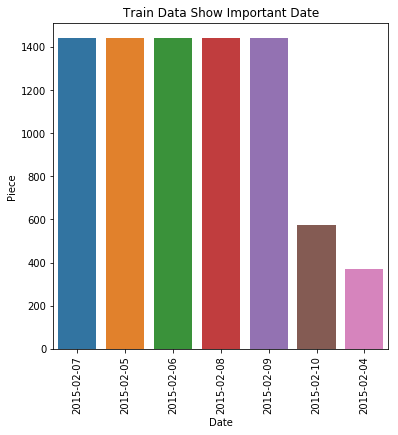

In [120]:
plt.figure(figsize=(6,6))
sns.barplot(x=train_data.Date.value_counts().index,y=train_data.Date.value_counts().values)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Piece')
plt.title('Train Data Show Important Date')
plt.show()

<p>
We had unique dates. The IOT device worked exactly 1 week. I must check out how much data I have collected during the entire week. Because I have to check if there is a big difference between the data.</p>

In [40]:
new_unique_date=[]
sum_of_temperature=[]
sum_of_humidity=[]
sum_of_light=[]
sum_of_co2=[]
sum_of_humidityRatio=[]

for date in date_unique:
    sum_of_temperature.append(sum(train_data[train_data['Date']==date].Temperature))
    sum_of_humidity.append(sum(train_data[train_data['Date']==date].Humidity))
    sum_of_light.append(sum(train_data[train_data['Date']==date].Light))
    sum_of_co2.append(sum(train_data[train_data['Date']==date].CO2))
    sum_of_humidityRatio.append(sum(train_data[train_data['Date']==date].HumidityRatio)) 
    new_unique_date.append(date)

In [41]:
sum_of_temperature=pd.DataFrame(data=sum_of_temperature,columns=['Temperature'])
sum_of_humidity=pd.DataFrame(data=sum_of_humidity,columns=['Humidity'])
sum_of_light=pd.DataFrame(data=sum_of_light,columns=['Light'])
sum_of_co2=pd.DataFrame(data=sum_of_co2,columns=['CO2'])
sum_of_humidityRatio=pd.DataFrame(data=sum_of_humidityRatio,columns=['HumidityRatio'])
date_unique_full=pd.DataFrame(data=new_unique_date,columns=['Date'])

date_unique_full=pd.concat([date_unique_full,sum_of_temperature,sum_of_humidity,sum_of_light,sum_of_co2,sum_of_humidityRatio],axis=1)
date_unique_full

,Date,Temperature,Humidity,Light,CO2,HumidityRatio
0,2015-02-04,8031.379167,9746.504500,6742.000000,1.975804e+05,1.572594
1,2015-02-05,30915.423333,34832.588667,282568.216667,9.877529e+05,5.530646
2,2015-02-06,30067.920667,28566.874833,286710.050000,8.606074e+05,4.361869
3,2015-02-07,29630.225667,29720.767500,96270.266667,6.387696e+05,4.426175
4,2015-02-08,28095.323833,42048.523667,36017.566667,6.249419e+05,5.891050
5,2015-02-09,29517.934167,45590.251750,241036.000000,1.359006e+06,6.867709
6,2015-02-10,11642.991250,19026.152917,23902.166667,2.704476e+05,2.802349


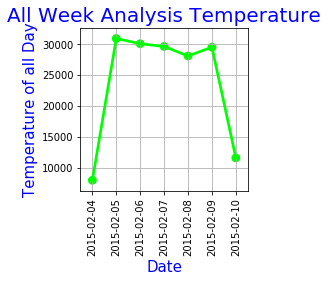

In [104]:
f,ax1=plt.subplots(figsize=(3,3))
sns.pointplot(x=date_unique_full.Date,y=date_unique_full.Temperature,data=date_unique_full,color='lime',alpha=0.8)
plt.xlabel('Date',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.ylabel('Temperature of all Day',fontsize = 15,color='blue')
plt.title('All Week Analysis Temperature',fontsize = 20,color='blue')
plt.grid()
plt.show()

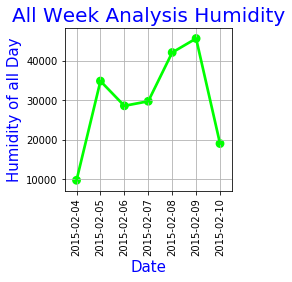

In [121]:
f,ax1=plt.subplots(figsize=(3,3))
sns.pointplot(x=date_unique_full.Date,y=date_unique_full.Humidity,data=date_unique_full,color='lime',alpha=0.8)
plt.xlabel('Date',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.ylabel('Humidity of all Day',fontsize = 15,color='blue')
plt.title('All Week Analysis Humidity',fontsize = 20,color='blue')
plt.grid()
plt.show()

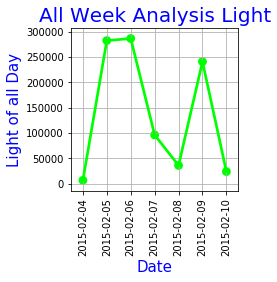

In [122]:
f,ax1=plt.subplots(figsize=(3,3))
sns.pointplot(x=date_unique_full.Date,y=date_unique_full.Light,data=date_unique_full,color='lime',alpha=0.8)
plt.xlabel('Date',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.ylabel('Light of all Day',fontsize = 15,color='blue')
plt.title('All Week Analysis Light',fontsize = 20,color='blue')
plt.grid()
plt.show()

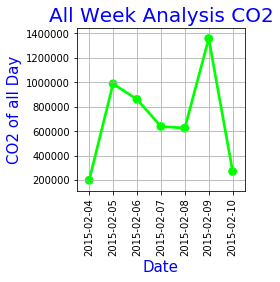

In [123]:
f,ax1=plt.subplots(figsize=(3,3))
sns.pointplot(x=date_unique_full.Date,y=date_unique_full.CO2,data=date_unique_full,color='lime',alpha=0.8)
plt.xlabel('Date',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.ylabel('CO2 of all Day',fontsize = 15,color='blue')
plt.title('All Week Analysis CO2',fontsize = 20,color='blue')
plt.grid()
plt.show()

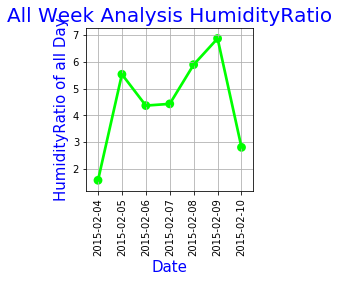

In [124]:
f,ax1=plt.subplots(figsize=(3,3))
sns.pointplot(x=date_unique_full.Date,y=date_unique_full.HumidityRatio,data=date_unique_full,color='lime',alpha=0.8)
plt.xlabel('Date',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.ylabel('HumidityRatio of all Day',fontsize = 15,color='blue')
plt.title('All Week Analysis HumidityRatio',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [49]:
print('Train Data Show First 5 Rows\n')
train_data.tail(5)

Train Data Show First 5 Rows



,Date,Time,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
8138,2015-02-10,09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8139,2015-02-10,09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8140,2015-02-10,09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8141,2015-02-10,09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1
8142,2015-02-10,09:33:00,21.10,36.2000,447.0,821.000000,0.005612,1


<p>From what I can see, the values between the data appear to be at the normal level. There is an irregularity between "Humidity" and "Temperature" alone. In order to se this situation, I must extract the correlation matrix and check the operation between them.</p>

In [50]:
print('Train Data Show Correlation\n')
train_data.corr()

Train Data Show Correlation



,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,0.538220
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.132964
Light,0.649942,0.037828,1.000000,0.664022,0.230420,0.907352
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.300282
Occupancy,0.538220,0.132964,0.907352,0.712235,0.300282,1.000000


In [51]:
train_data.Date.unique()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 8 columns):
Date             8143 non-null object
Time             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 445.4+ KB


<h3><b>2.4. Analysing Time</b></h3>
<p>I noticed something.IOT device which has done work in the time interval.Generally, office workers can work on weekdays, so I can take the part of the weekend or use it in a different way.</p>

In [52]:
data_list=train_data.Date.unique()
index=0
first_dates=[]
last_dates=[]
for date in data_list:
    first_dates.append(min(train_data[train_data['Date']==date].Time))
    last_dates.append(max(train_data[train_data['Date']==date].Time))    

In [53]:
print('Every Date Start Work\n')
first_dates

Every Date Start Work



['17:51:00',
 '00:00:00',
 '00:00:00',
 '00:00:00',
 '00:00:00',
 '00:00:00',
 '00:00:00']

In [54]:
print('Every Date Stop Work\n')
last_dates

Every Date Stop Work



['23:58:59',
 '23:58:59',
 '23:58:59',
 '23:58:59',
 '23:58:59',
 '23:58:59',
 '09:33:00']

In [55]:
print('Daily Work Hours\n')
tDiff=[]
for s in first_dates:
    t1=s
    for e in last_dates:
        t2=e
        tDiff.append(datetime.strptime(t2,'%H:%M:%S')-datetime.strptime(t1,'%H:%M:%S'))
        break

for c in tDiff:
    print(c)

Daily Work Hours

6:07:59
23:58:59
23:58:59
23:58:59
23:58:59
23:58:59
23:58:59


In [56]:
t_data=train_data.iloc[369,:]

<p>We have drawn the results. We have drawn out the missing data. Because, in any way, we do not want incomplete data or incomplete data. There may be a big problem training our training set.</p>

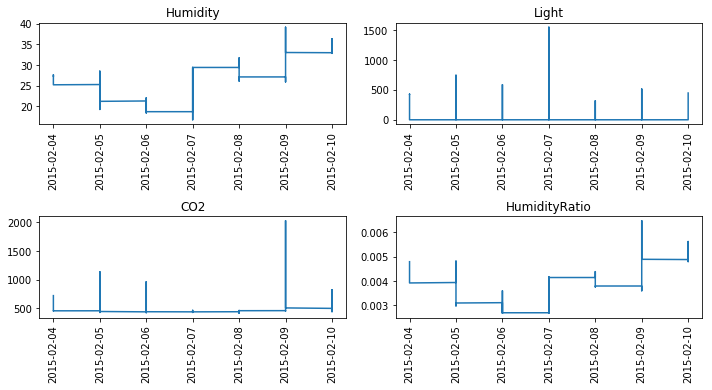

In [57]:
for i, col in enumerate(train_data.iloc[369:,3:7].columns.values):
    plt.subplot(4, 2, i+1)
    plt.plot(train_data['Date'].values.tolist(), train_data[col].values.tolist())
    plt.title(col)
    plt.xticks(rotation=90)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(10, 10)
    plt.tight_layout()
plt.show()

<p>
As you can see, there is a noticeable increase in data on some dates after drawing the data. Maybe we can do some analysis using this stop.</p>

<p>At that time, office workers may have worked intensively. When we look at the date of 2015-02-07, we see that light data is very much used. As for 2015-02-09, CO2 ratio is quite high. In addition, it is seen that there are very few carbon dioxide data. Maybe those days can be the weekend.</p>

print('Outlier datas drop in Train_data\n')
for i,data in enumerate(train_data.Date):
    if(data=='2015-02-04'):
         train_data=train_data.drop(train_data.index[i],axis=0,inplace=True) 

In [58]:
train_data.head(5)

,Date,Time,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04,17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04,17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04,17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04,17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04,17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


<p>
Now, because we are going to work between dates, we convert the date column to the date format in all datasets. In this way, we will do not deterioration between the dates.</p>

In [59]:
def convert_object_dates(getdata):
    for i,date in enumerate(getdata['Date']):
        getdata.iloc[i,getdata.columns.get_loc('Date')]=datetime.strptime(date,'%Y-%m-%d')

In [60]:
convert_object_dates(train_data)
convert_object_dates(test1_data)
convert_object_dates(test2_data)

In [178]:
#train_data=train_data.drop('Hour',axis=1)

<p>Now, we have convert the date column. Then we do the separation process to do time column over analysis. To make an analysis per hour, we need to make a separation. Because you have hours, minutes and seconds. In a place where all of them time analysis is made difficult. That's why we split the timeline.</p>

In [61]:
time_value=train_data.Time
H=[]
M=[]
S=[]
for i,data in enumerate(time_value):
    H.append(data.split(':')[0])
    M.append(data.split(':')[1])
    S.append(data.split(':')[2])

In [62]:
H=pd.DataFrame(H,columns=['Hour'])
train_data=pd.concat([H,train_data],axis=1)

In [63]:
time_value=test1_data.Time
H=[]
M=[]
S=[]
for i,data in enumerate(time_value):
    H.append(data.split(':')[0])
    M.append(data.split(':')[1])
    S.append(data.split(':')[2])

In [64]:
H=pd.DataFrame(H,columns=['Hour'])
test1_data=pd.concat([H,test1_data],axis=1)

In [65]:
time_value=test2_data.Time
H=[]
M=[]
S=[]
for i,data in enumerate(time_value):
    H.append(data.split(':')[0])
    M.append(data.split(':')[1])
    S.append(data.split(':')[2])

In [66]:
H=pd.DataFrame(H,columns=['Hour'])
test2_data=pd.concat([H,test2_data],axis=1)

In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 9 columns):
Hour             8143 non-null object
Date             8143 non-null object
Time             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(1), object(3)
memory usage: 477.2+ KB


In [68]:
test2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9752 entries, 0 to 9751
Data columns (total 9 columns):
Hour             9752 non-null object
Date             9752 non-null object
Time             9752 non-null object
Temperature      9752 non-null float64
Humidity         9752 non-null float64
Light            9752 non-null float64
CO2              9752 non-null float64
HumidityRatio    9752 non-null float64
Occupancy        9752 non-null int64
dtypes: float64(5), int64(1), object(3)
memory usage: 571.4+ KB


In [69]:
train_data.Hour=train_data.Hour.astype(int)
test1_data.Hour=test1_data.Hour.astype(int)
test2_data.Hour=test2_data.Hour.astype(int)
test2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9752 entries, 0 to 9751
Data columns (total 9 columns):
Hour             9752 non-null int32
Date             9752 non-null object
Time             9752 non-null object
Temperature      9752 non-null float64
Humidity         9752 non-null float64
Light            9752 non-null float64
CO2              9752 non-null float64
HumidityRatio    9752 non-null float64
Occupancy        9752 non-null int64
dtypes: float64(5), int32(1), int64(1), object(2)
memory usage: 571.4+ KB


<p>As every hourly analysis is done, we sum all values per hour. Then we find out how many of the selected hours. We divide it into the time. The result is an hourly analysis. This is necessary for our assessment of the morning, lunch and evening hours.</p>

In [70]:
time_unique=train_data.Hour.unique()
avg_of_temperature=[]
avg_of_humidity=[]
avg_of_light=[]
avg_of_co2=[]
avg_of_humidityRatio=[]
piecess=[]
how_many_times=train_data.Hour.value_counts()
for i in how_many_times.values:
    piecess.append(i)
index=0
for time in time_unique:
    avg_of_temperature.append(sum(train_data[train_data['Hour']==time].Temperature)/piecess[index])
    avg_of_humidity.append(sum(train_data[train_data['Hour']==time].Humidity)/piecess[index])
    avg_of_light.append(sum(train_data[train_data['Hour']==time].Light)/piecess[index])
    avg_of_co2.append(sum(train_data[train_data['Hour']==time].CO2)/piecess[index])
    avg_of_humidityRatio.append(sum(train_data[train_data['Hour']==time].HumidityRatio)/piecess[index]) 


In [71]:
avg_of_temperature=pd.DataFrame(data=avg_of_temperature,columns=['Temperature'])
avg_of_humidity=pd.DataFrame(data=avg_of_humidity,columns=['Humidity'])
avg_of_light=pd.DataFrame(data=avg_of_light,columns=['Light'])
avg_of_co2=pd.DataFrame(data=avg_of_co2,columns=['CO2'])
avg_of_humidityRatio=pd.DataFrame(data=avg_of_humidityRatio,columns=['HumidityRatio'])
time_unique_full=pd.DataFrame(data=time_unique,columns=['Time'])

time_unique_full=pd.concat([time_unique_full,avg_of_temperature,avg_of_humidity,avg_of_light,avg_of_co2,avg_of_humidityRatio],axis=1)
time_unique_full=time_unique_full.sort_index()

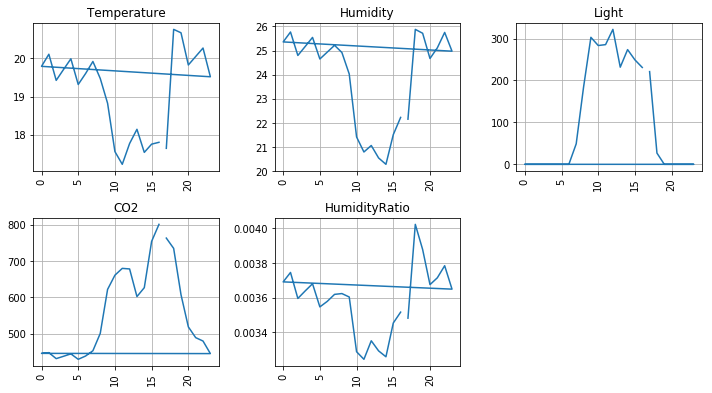

In [129]:
for i, col in enumerate(time_unique_full.columns.values[1:]):
    plt.subplot(3, 3, i+1)
    plt.plot(time_unique_full['Time'].values.tolist(), time_unique_full[col].values.tolist(), label=col)
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(10, 8)
    plt.tight_layout()
    plt.grid(True)
    plt.xticks(rotation=90)
plt.show()

<p>As a result of our evaluation, we analyzed according to the hour. This way we can make comments on the graph. The graph shows how high the data is within certain study areas. Sometimes it is seen how much data is below the value.</p>

<p>Thus, we can make inferences about the data. Office workers may have a day at lunch. Then maybe they could have gone to lunch. In addition, there is a possibility that it will coincide with the end of the week. We will continue to take action considering all situations.</p>

In [73]:
train_data.corr()

,Hour,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Hour,1.000000,0.260361,0.017134,0.084507,0.209669,0.096271,0.079630
Temperature,0.260361,1.000000,-0.141759,0.649942,0.559894,0.151762,0.538220
Humidity,0.017134,-0.141759,1.000000,0.037828,0.439023,0.955198,0.132964
Light,0.084507,0.649942,0.037828,1.000000,0.664022,0.230420,0.907352
CO2,0.209669,0.559894,0.439023,0.664022,1.000000,0.626556,0.712235
HumidityRatio,0.096271,0.151762,0.955198,0.230420,0.626556,1.000000,0.300282
Occupancy,0.079630,0.538220,0.132964,0.907352,0.712235,0.300282,1.000000


In [74]:
train_data.head()

,Hour,Date,Time,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,17,2015-02-04 00:00:00,17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,17,2015-02-04 00:00:00,17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,17,2015-02-04 00:00:00,17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,17,2015-02-04 00:00:00,17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,17,2015-02-04 00:00:00,17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


<p>We know the days of the week. Let the office workers identify  which dates worked and let's find the weekend.</p>

In [75]:
all_days=['Monday','Thuesday','Wednasday','Thursday','Friday','Saturday','Sunday']

all_dates=train_data.Date.unique()
all_days_final=[]
for date in all_dates:
     all_days_final.append(datetime.strptime(str(date),'%Y-%m-%d %H:%M:%S'))
    
for date in all_days_final:
    print(all_days[date.weekday()],'---',date)

Wednasday --- 2015-02-04 00:00:00
Thursday --- 2015-02-05 00:00:00
Friday --- 2015-02-06 00:00:00
Saturday --- 2015-02-07 00:00:00
Sunday --- 2015-02-08 00:00:00
Monday --- 2015-02-09 00:00:00
Thuesday --- 2015-02-10 00:00:00


<p>As you can see, the weekend was between 07-08.</p>

<p>
Now, we will try to find the initial values ​​of all dates through the training data set. In this way, office workers are working in the office within the time range.</p>

In [76]:
list_of_index_start=[]
for i in range(4,11):
    print(i)
    list_of_index_start.append(train_data.Date.values.tolist().index(datetime.strptime('2015-02-'+str(i)+' 00:00:00','%Y-%m-%d %H:%M:%S')))
print(list_of_index_start)

4
5
6
7
8
9
10
[0, 369, 1809, 3249, 4689, 6129, 7569]


In [77]:
all_time_unique=train_data.Time.unique()
start_end_work=[]
for date in train_data.Date.unique():
    start_end_work.append(train_data[(train_data['Occupancy']==1)&(train_data['Date']==date)].Time)

In [78]:
start_work_time=[]
end_work_time=[]
for r in range(len(start_end_work)):
    start_work_time.append(0)
    end_work_time.append(len(start_end_work[r]))
print(start_work_time)
print(end_work_time)

start_work=[]
end_work=[]

first_list_time=[]
for r in start_end_work[0]:
    first_list_time.append(r)

second_list_time=[]    
for r in start_end_work[1]:
    second_list_time.append(r)

third_list_time=[]    
for r in start_end_work[2]:
    third_list_time.append(r)

fourth_list_time=[]    
for r in start_end_work[3]:
    fourth_list_time.append(r)

fiveth_list_time=[]    
for r in start_end_work[4]:
    fiveth_list_time.append(r)
    
sixth_list_time=[]    
for r in start_end_work[5]:
    sixth_list_time.append(r)
    
seventh_list_time=[]    
for r in start_end_work[6]:
    seventh_list_time.append(r)

start_work.append(first_list_time[0])  
start_work.append(second_list_time[0])  
start_work.append(third_list_time[0])  
#start_work.append(fourth_list_time[0])  
#start_work.append(fiveth_list_time[0])  
start_work.append(sixth_list_time[0])
start_work.append(seventh_list_time[0])  

###############################################

end_work.append(first_list_time[15])  
end_work.append(second_list_time[538])  
end_work.append(third_list_time[585])  
#end_work.append(fourth_list_time[0])  
#end_work.append(fiveth_list_time[0])  
end_work.append(sixth_list_time[533])
end_work.append(seventh_list_time[53])
    

[0, 0, 0, 0, 0, 0, 0]
[16, 539, 586, 0, 0, 534, 54]


<p>Now, I found time series on training data. If you look at the values, you will 0 values. This mean weekend</p>

<p>In addition, we found weekly <u>starting hour</u> values.</p>
<p>In addition, we found weekly <u>ending hour</u> values.</p>

In [79]:
start_work

['17:51:00', '07:38:00', '07:40:59', '08:44:59', '08:38:00']

In [80]:
end_work

['18:06:00', '18:04:00', '18:06:00', '18:04:00', '09:33:00']

In [82]:
working_hours={'Date':['2015-02-04','2015-02-05','2015-02-06','2015-02-07','2015-02-08','2015-02-09','2015-02-10'],
               'Start':['17:51:00','07:38:00','07:40:59','0','0','08:44:59','08:38:00'],
               'End':['18:06:00','18:04:00','18:06:00','0','0','18:04:00','09:33:00']}

In [83]:
working_hours

{'Date': ['2015-02-04',
  '2015-02-05',
  '2015-02-06',
  '2015-02-07',
  '2015-02-08',
  '2015-02-09',
  '2015-02-10'],
 'End': ['18:06:00', '18:04:00', '18:06:00', '0', '0', '18:04:00', '09:33:00'],
 'Start': ['17:51:00',
  '07:38:00',
  '07:40:59',
  '0',
  '0',
  '08:44:59',
  '08:38:00']}

In [84]:
working_hours=pd.DataFrame(working_hours,columns=['Date','Start','End'])
working_hours

,Date,Start,End
0,2015-02-04,17:51:00,18:06:00
1,2015-02-05,07:38:00,18:04:00
2,2015-02-06,07:40:59,18:06:00
3,2015-02-07,0,0
4,2015-02-08,0,0
5,2015-02-09,08:44:59,18:04:00
6,2015-02-10,08:38:00,09:33:00


In [85]:
list_of_index_start

[0, 369, 1809, 3249, 4689, 6129, 7569]

In [86]:
train_data_v2=train_data
#train_data_v2
#train_data=train_data_v2

In [87]:
train_data.shape

(8143, 9)

In [88]:
#train_data=train_data.drop('Hour',axis=1)
#test1_data=test1_data.drop('Hour',axis=1)
#test2_data=test2_data.drop('Hour',axis=1)

<h3><b>2.5. Conclusion of Analyses</b></h3>

<p>
As I have seen before, some of the results appear as a result of the correlation. Based on these results, we will make some evaluations. We'll create new features here. We will use the relationship between CO2 and light values ​​over all data sets. In addition, we will distribute the humidity and humidity which are closest to each other. This will give us an equal rate. As a result of all the evaluations we made, we multiply the degree values ​​and we write the result. In this case we have a new feature.</p>

In [89]:
train_data['Feature1']=(train_data.CO2*train_data.Light)/((train_data.Humidity/train_data.HumidityRatio)*train_data.Temperature)

In [90]:
test1_data['Feature1']=(test1_data.CO2*test1_data.Light)/((test1_data.Humidity/test1_data.HumidityRatio)*test1_data.Temperature)

In [91]:
test2_data['Feature1']=(test2_data.CO2*test2_data.Light)/((test2_data.Humidity/test2_data.HumidityRatio)*test2_data.Temperature)

<p>As a result of all our evaluations are described in the following scatter matrix. The next evaluation will be adding new features.</p>

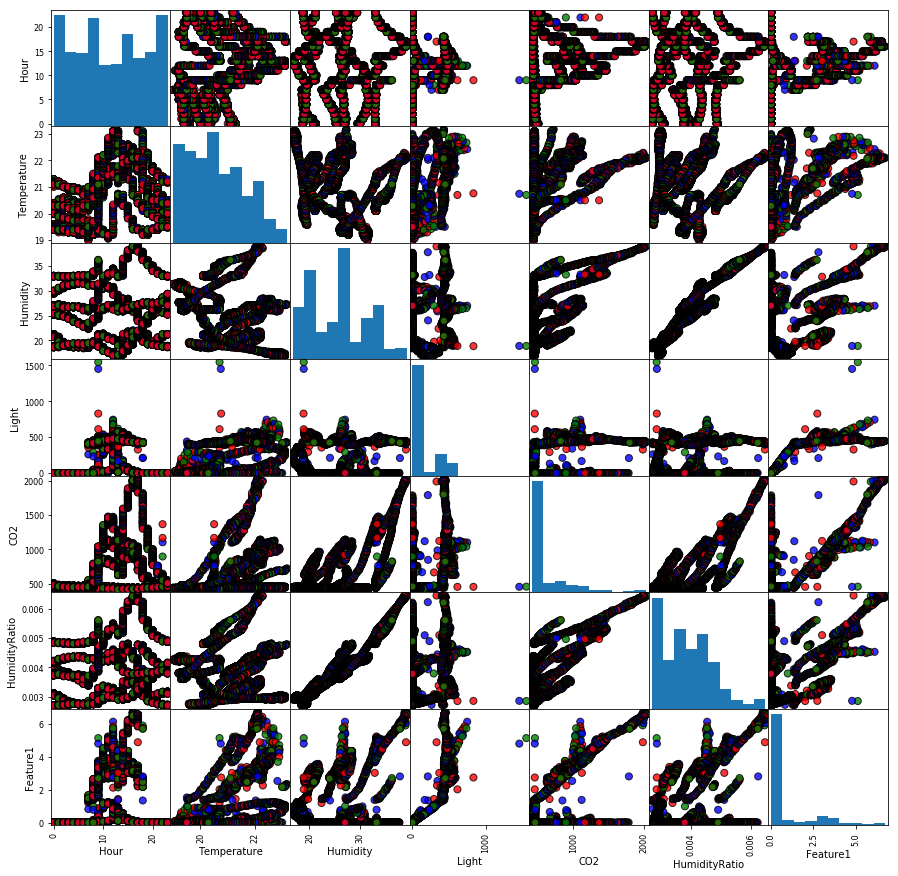

In [92]:
pd.plotting.scatter_matrix(train_data.loc[:, train_data.columns != 'Occupancy'],
                                       c=['green','blue','red'],
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.8,
                                       s = 200,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

In [93]:
test1_data.head(5)

,Hour,Date,Time,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Feature1
0,14,2015-02-02 00:00:00,14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1,3.354650
1,14,2015-02-02 00:00:00,14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1,3.366374
2,14,2015-02-02 00:00:00,14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1,3.374313
3,14,2015-02-02 00:00:00,14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1,2.928032
4,14,2015-02-02 00:00:00,14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1,2.915151


In [94]:
test2_data.head(5)

,Hour,Date,Time,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Feature1
0,14,2015-02-11 00:00:00,14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1,3.337459
1,14,2015-02-11 00:00:00,14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1,3.242712
2,14,2015-02-11 00:00:00,14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1,3.229027
3,14,2015-02-11 00:00:00,14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1,3.284939
4,14,2015-02-11 00:00:00,14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1,3.261200


<p>Now, I will add second <u>new features</u> for all data sets. We know wekeend any more. As a result of the information we have previously extracted from the data, we have determined the weekend. We put the indices on the weekends to get the values between each other. If the data is not the the wekeend 0, the data wekeend ise 1 </p>

In [95]:
train_data.loc[:, 'Feature2'] = 0
for i, date in enumerate(train_data['Date']):
    if (all_days[date.weekday()] == 'Saturday') or (all_days[date.weekday()] == 'Sunday'):
         train_data.iloc[i, train_data.columns.get_loc('Feature2')] = 1
           
            
test1_data.loc[:, 'Feature2'] = 0
for i, date in enumerate(test1_data['Date']):
    if (all_days[date.weekday()] == 'Saturday') or (all_days[date.weekday()] == 'Sunday'):
         test1_data.iloc[i, test1_data.columns.get_loc('Feature2')] = 1
    
test2_data.loc[:, 'Feature2'] = 0
for i, date in enumerate(test2_data['Date']):
    if (all_days[date.weekday()] == 'Saturday') or (all_days[date.weekday()] == 'Sunday'):
         test2_data.iloc[i, test2_data.columns.get_loc('Feature2')] = 1


<p>
The last new feature is to divide certain days into specific times in order to better analyze the processes that will occur throughout the week. This will be the time of morning, lunch and evening.In this way, we will always be able to access all the situations per day. When we do the analysis we will get a result from all the evaluations.</p>

In [96]:
train_data.loc[:,'Feature3']=0
for i,times in enumerate(train_data['Hour']):
    if(times>=7 and times<=10):
        train_data.iloc[i,train_data.columns.get_loc('Feature3')]=0
    elif(times>=11 and times<=15):
        train_data.iloc[i,train_data.columns.get_loc('Feature3')]=1
    elif(times>=16):
        train_data.iloc[i,train_data.columns.get_loc('Feature3')]=2
    

test1_data.loc[:,'Feature3']=0
for i,times in enumerate(test1_data['Hour']):
    if(times>=7 and times<=10):
        test1_data.iloc[i,test1_data.columns.get_loc('Feature3')]=0
    elif(times>=11 and times<=15):
        test1_data.iloc[i,test1_data.columns.get_loc('Feature3')]=1
    elif(times>=16):
        test1_data.iloc[i,test1_data.columns.get_loc('Feature3')]=2
        
test2_data.loc[:,'Feature3']=0
for i,times in enumerate(test2_data['Hour']):
    if(times>=7 and times<=10):
        test2_data.iloc[i,test2_data.columns.get_loc('Feature3')]=0
    elif(times>=11 and times<=15):
        test2_data.iloc[i,test2_data.columns.get_loc('Feature3')]=1
    elif(times>=16):
        test2_data.iloc[i,test2_data.columns.get_loc('Feature3')]=2

In [97]:
train_data.head(5)

,Hour,Date,Time,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Feature1,Feature2,Feature3
0,17,2015-02-04 00:00:00,17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,2.329546,0,2
1,17,2015-02-04 00:00:00,17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,2.323836,0,2
2,17,2015-02-04 00:00:00,17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,2.303270,0,2
3,17,2015-02-04 00:00:00,17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,2.286294,0,2
4,17,2015-02-04 00:00:00,17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,2.272177,0,2


<p>Then,I need to remove some columns on data sets such as Hour,Time and Date. Because I will analysis for all data sets. This data prevents the system from working well.</p>

In [98]:
test2_data=test2_data.drop(['Hour','Time','Date'],axis=1)
test1_data=test1_data.drop(['Hour','Time','Date'],axis=1)
train_data=train_data.drop(['Hour','Time','Date'],axis=1)

<h3><b>3. Modeling, Training and Testing</b></h3>
<p>Now, data analysis.</p>
<p>We have to divide all of our data sets while analyzing data. Because the data in our model will be trained first and then the test data will be used to predict the values.</p>

<p>In addition I have defined the feature list. The algorithm I developed will be used to test models. So, the features will be tested by dividing them into different combinations.</p>

<p>List of Algorithms to Use :</p>

<ul>
<li>Logistic Regression</li>
<li>Naïve Bayes</li>
<li>K-Nearest Neighbors</li>
<li>Decision Tree</li>
<li>Random Forest</li>
<li>Gradient Boosting Machine</li>
<li>Kernelized Support Vector Machine</li>
</ul>



<p>Generally, the model I followed in algorithms is as follows</p>
<ul>
<li>Defining parameters</li>
<li>Defining feature combinations</li>
<li>I've created a Cross-validation value.</li>
<li>Fit the model and predict train, test1, and test2 sets.</li>
<li>Print classification report.</li>
</ul>


<p>
After running each model I wrote the results of a table halide. In addition, I have made various evaluations. </p>

In [99]:
X_train=train_data.drop('Occupancy',axis=1)
y_train=train_data['Occupancy']

X_test1=test1_data.drop('Occupancy',axis=1)
y_test1=test1_data['Occupancy']

X_test2=test2_data.drop('Occupancy',axis=1)
y_test2=test2_data['Occupancy']

combine_features_list=[
    ('Light','CO2'),
    ('CO2','Temperature'),
    ('Feature1','Feature2','Feature3'),
    ('Feature3','Light','CO2'),
    ('Humidity','CO2')
]

<h3><b>3.1. Logistic Regression</b></h3>

In [100]:
parameters=[
    {
        'penalty':['l1','l2'],
        'C':[0.5,0.7,1.0],
        'random_state':[0]
    },
    
]
print("*"*50)
for features in combine_features_list:
    print(features)
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test1.loc[:,features]
    X_test2_set=X_test2.loc[:,features]

    gslog=GridSearchCV(LogisticRegression(),parameters,scoring='accuracy')
    gslog.fit(X_train_set,y_train)

    print('Best parameters set:')
    print(gslog.best_params_)
    print()
    
    predictions=[
        (gslog.predict(X_train_set),y_train,'Train'),
        (gslog.predict(X_test1_set),y_test1,'Test1'),
        (gslog.predict(X_test2_set),y_test2,'Test2'),
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

**************************************************
('Light', 'CO2')
**************************************************
Best parameters set:
{'C': 1.0, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:
**************************************************
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      6414
          1       0.95      1.00      0.97      1729

avg / total       0.99      0.99      0.99      8143

**************************************************
Train Confusion Matrix:
[[6324   90]
 [   5 1724]]
**************************************************
Test1 Classification Report:
**************************************************
             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      1.00      0.97       972

avg / total       0.98      0.98      0.98      2665

**************************************************
Test1 Confusion Ma

<table>
<tr>
    <th>Features</th>
    <th>Parameters</th>
    <th>Train Set</th>
    <th>Test1 Set</th>
    <th>Test2 Set</th>
</tr>
<tr>
<td>('Light','CO2')</td>
<td>{'C': 1.0, 'penalty': 'l2', 'random_state': 0}</td>
<td>99</td>
<td>98</td>
<td>99</td>
</tr>
<tr>
<td>('CO2','Temperature')</td>
<td>{'C': 1.0, 'penalty': 'l1', 'random_state': 0}</td>
<td>90</td>
<td>88</td>
<td>82</td>
</tr>
<tr>
<td>('Feature1','Feature2','Feature3')</td>
<td>{'C': 0.5, 'penalty': 'l2', 'random_state': 0}</td>
<td>99</td>
<td>98</td>
<td>96</td>
</tr>
<tr>
<td>('Feature3','Light','CO2')</td>
<td>{'C': 0.5, 'penalty': 'l2', 'random_state': 0}</td>
<td>98</td>
<td>99</td>
<td>98</td>
</tr>
<tr>
<td>('Humidity','CO2')</td>
<td>{'C': 0.5, 'penalty': 'l2', 'random_state': 0}</td>
<td>92</td>
<td>88</td>
<td>76</td>
</tr>
</table>

<p>The new features gave good results. Feature1, Feature2 and Feature3 have good accuracy,but humidity and co2 have not good accurancy.</p>
<p>The best are Light-CO2 and Feature3-Light-CO2. But I am afraid my features here are not very much helpful since Light-CO2 did 99% alone. Altough this accuracy is pleasing, my instincts bother me by saying they are overfitted.</p>

<h3><b>3.2. Naive Bayes</b></h3>

In [102]:
print("*"*50)
for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test1.loc[:,features]
    X_test2_set=X_test2.loc[:,features]
    
    nb=GaussianNB()
    nb.fit(X_train_set,y_train)

    predictions=[
        (nb.predict(X_train_set),y_train,'Train'),
        (nb.predict(X_test1_set),y_test1,'Test1'),
        (nb.predict(X_test2_set),y_test2,'Test2'),
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)


**************************************************
**************************************************
Train Classification Report:
**************************************************
             precision    recall  f1-score   support

          0       1.00      0.98      0.99      6414
          1       0.93      1.00      0.96      1729

avg / total       0.98      0.98      0.98      8143

**************************************************
Train Confusion Matrix:
[[6284  130]
 [   4 1725]]
**************************************************
Test1 Classification Report:
**************************************************
             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      0.99      0.97       972

avg / total       0.98      0.98      0.98      2665

**************************************************
Test1 Confusion Matrix:
[[1638   55]
 [   6  966]]
**************************************************
Te

C:\Users\aAa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<table>
<tr>
    <th>Features</th>
    <th>Train Set</th>
    <th>Test1 Set</th>
    <th>Test2 Set</th>
</tr>
<tr>
<td>('Light','CO2')</td>
<td>98</td>
<td>98</td>
<td>99</td>
</tr>
<tr>
<td>('CO2','Temperature')</td>
<td>92</td>
<td>87</td>
<td>83</td>
</tr>
<tr>
<td>('Feature1','Feature2','Feature3')</td>
<td>86</td>
<td>13</td>
<td>85</td>
</tr>
<tr>
<td>('Feature3','Light','CO2')</td>
<td>98</td>
<td>98</td>
<td>99</td>
</tr>
<tr>
<td>('Humidity','CO2')</td>
<td>89</td>
<td>87</td>
<td>81</td>
</tr>
</table>

<p>
Overall it is good but I see that some data is underfit.Probably because of the split data I've made. However, Feature1, Feature2 and Feature3 very good accurancy.</p>

<h3><b>3.3. K-Nearest Neighbors<b></h3>

In [104]:
parameters=[
    {
        'n_neighbors':np.arange(1,51),
        'n_jobs':[1,2]
    },
]
print("*"*50)
for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test1.loc[:,features]
    X_test2_set=X_test2.loc[:,features] 

    gsknn=GridSearchCV(KNeighborsClassifier(),parameters,scoring='accuracy')
    gsknn.fit(X_train_set,y_train)

    print('Best parameters set:')
    print(gsknn.best_params_)
    print("*"*50)

    predictions = [
            (gsknn.predict(X_train_set), y_train, 'Train'),
            (gsknn.predict(X_test1_set), y_test1, 'Test1'),
            (gsknn.predict(X_test2_set), y_test2, 'Test2')
        ]

    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)


**************************************************
**************************************************
Best parameters set:
{'n_jobs': 1, 'n_neighbors': 33}
**************************************************
Train Classification Report:
**************************************************
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      6414
          1       0.95      1.00      0.97      1729

avg / total       0.99      0.99      0.99      8143

**************************************************
Train Confusion Matrix:
[[6324   90]
 [   5 1724]]
**************************************************
Test1 Classification Report:
**************************************************
             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      1.00      0.97       972

avg / total       0.98      0.98      0.98      2665

**************************************************

<table>
<tr>
    <th>Features</th>
    <th>Parameters</th>
    <th>Train Set</th>
    <th>Test1 Set</th>
    <th>Test2 Set</th>
</tr>
<tr>
<td>('Light','CO2')</td>
<td>{'n_jobs': 1, 'n_neighbors': 33}</td>
<td>99</td>
<td>98</td>
<td>97</td>
</tr>
<tr>
<td>('CO2','Temperature')</td>
<td>{'n_jobs': 1, 'n_neighbors': 49}</td>
<td>93</td>
<td>86</td>
<td>79</td>
</tr>
<tr>
<td>('Feature1','Feature2','Feature3')</td>
<td>{'n_jobs': 1, 'n_neighbors': 9}</td>
<td>99</td>
<td>98</td>
<td>99</td>
</tr>
<tr>
<td>('Feature3','Light','CO2')</td>
<td>{'n_jobs': 1, 'n_neighbors': 33}</td>
<td>99</td>
<td>98</td>
<td>97</td>
</tr>
<tr>
<td>('Humidity','CO2')</td>
<td>{'n_jobs': 1, 'n_neighbors': 47}</td>
<td>93</td>
<td>87</td>
<td>79</td>
</tr>
</table>

<p>
There is neither underfitting nor overfitting status in any way. The new feature that I've done gave nice value. The new features I've created are feature1, Feature2 and Feature3 9 neighbors. In addition, there is a problem with a test2 data set only between CO2 and Temperature.</p>


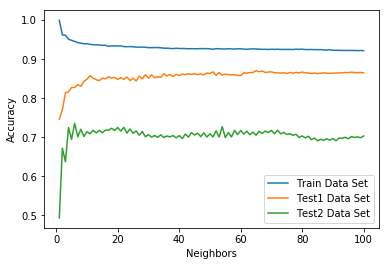

In [101]:
n_neighbors = range(1, 101)
train_data_accuracy = []
test1_data_accuracy = []
test2_data_accuracy = []

for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    knn.fit(X_train_set, y_train)
    train_data_accuracy.append(knn.score(X_train_set, y_train))
    test1_data_accuracy.append(knn.score(X_test1_set, y_test1))
    test2_data_accuracy.append(knn.score(X_test2_set, y_test2))
    
plt.plot(n_neighbors, train_data_accuracy, label="Train Data Set")
plt.plot(n_neighbors, test1_data_accuracy, label="Test1 Data Set")
plt.plot(n_neighbors, test2_data_accuracy, label="Test2 Data Set")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

<p>Thus, if we want to examine the changes in all datasets in the knn algorithm, we see the graph above. As you can see, there is good progress in the data training section. In addition, it is effective in progress in test1 data. But test2 presents problems in the data set. Here we need to do in the test2 data set, I will either extract and export outlier data, or add data.</p>

<h3><b>3.4. Decision Tree Algorithm</b></h3>

In [102]:
parameters = [
    {
        'max_depth': np.arange(1, 101),
        'min_samples_split': np.arange(2, 5),
        'random_state': [0]
    },
]

for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test1.loc[:,features]
    X_test2_set=X_test2.loc[:,features]
    
    tree = GridSearchCV(DecisionTreeClassifier(), parameters,
                           scoring='accuracy')
    tree.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(tree.best_params_)
    print()

    predictions = [
            (tree.predict(X_train_set), y_train, 'Train'),
            (tree.predict(X_test1_set), y_test1, 'Test1'),
            (tree.predict(X_test2_set), y_test2, 'Test2')
        ]

    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

**************************************************
Best parameters set:
{'max_depth': 1, 'min_samples_split': 2, 'random_state': 0}

Train Classification Report:
**************************************************
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      6414
          1       0.95      0.99      0.97      1729

avg / total       0.99      0.99      0.99      8143

**************************************************
Train Confusion Matrix:
[[6324   90]
 [   9 1720]]
**************************************************
Test1 Classification Report:
**************************************************
             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      1.00      0.97       972

avg / total       0.98      0.98      0.98      2665

**************************************************
Test1 Confusion Matrix:
[[1639   54]
 [   3  969]]
**********************

<table>
<tr>
    <th>Features</th>
    <th>Parameters</th>
    <th>Train Set</th>
    <th>Test1 Set</th>
    <th>Test2 Set</th>
</tr>
<tr>
<td>('Light','CO2')</td>
<td>{'max_depth': 1, 'min_samples_split': 2, 'random_state': 0}</td>
<td>99</td>
<td>98</td>
<td>99</td>
</tr>
<tr>
<td>('CO2','Temperature')</td>
<td>{'max_depth': 1, 'min_samples_split': 2, 'random_state': 0}</td>
<td>93</td>
<td>87</td>
<td>78</td>
</tr>
<tr>
<td>('Feature1','Feature2','Feature3')</td>
<td>{'max_depth': 1, 'min_samples_split': 2, 'random_state': 0}</td>
<td>99</td>
<td>98</td>
<td>98</td>
</tr>
<tr>
<td>('Feature3','Light','CO2')</td>
<td>{'max_depth': 1, 'min_samples_split': 2, 'random_state': 0}</td>
<td>99</td>
<td>98</td>
<td>99</td>
</tr>
<tr>
<td>('Humidity','CO2')</td>
<td>{'max_depth': 3, 'min_samples_split': 2, 'random_state': 0}</td>
<td>93</td>
<td>87</td>
<td>74</td>
</tr>
</table>

<p>Thus, I applied the decisiontree algorithm. The results were very successful. As far as I can see from the chart, max_dept, which is one of the parameters we have given for the decisiontree algorithm, has processed at most 3 levels. In addition, min_samples_split value is treated at maximum 2 levels. Therefore, these values ensure that the data is sufficient for all data</p>


<h3><b>3.5. Random Forest Classifier</b></h3>

In [103]:
paramters = [
    {
        'max_depth': np.arange(1, 101),
        'min_samples_split': np.arange(2, 5),
        'random_state': [0],
        'n_estimators': np.arange(10, 20)
    },
]

for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test1.loc[:,features]
    X_test2_set=X_test2.loc[:,features]

    tree = GridSearchCV(RandomForestClassifier(), parameters,
                           scoring='accuracy')
    tree.fit(X_train_set, y_train)

    print('Best parameters set:')
    print(tree.best_params_)
    print("*"*50)

    predictions = [
            (tree.predict(X_train_set), y_train, 'Train'),
            (tree.predict(X_test1_set), y_test1, 'Test1'),
            (tree.predict(X_test2_set), y_test2, 'Test2')
        ]

    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)


**************************************************
Best parameters set:
{'max_depth': 4, 'min_samples_split': 2, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      6414
          1       0.96      1.00      0.98      1729

avg / total       0.99      0.99      0.99      8143

**************************************************
Train Confusion Matrix:
[[6337   77]
 [   3 1726]]
**************************************************
Test1 Classification Report:
**************************************************
             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.94      0.99      0.97       972

avg / total       0.98      0.98      0.98      2665

**************************************************
Test1 Confusion Matrix:

<table>
<tr>
    <th>Features</th>
    <th>Parameters</th>
    <th>Train Set</th>
    <th>Test1 Set</th>
    <th>Test2 Set</th>
</tr>
<tr>
<td>('Light','CO2')</td>
<td>{'max_depth': 4, 'min_samples_split': 2, 'random_state': 0}</td>
<td>99</td>
<td>98</td>
<td>97</td>
</tr>
<tr>
<td>('CO2','Temperature')</td>
<td>{'max_depth': 1, 'min_samples_split': 2, 'random_state': 0}</td>
<td>91</td>
<td>84</td>
<td>88</td>
</tr>
<tr>
<td>('Feature1','Feature2','Feature3')</td>
<td>{'max_depth': 3, 'min_samples_split': 2, 'random_state': 0}</td>
<td>99</td>
<td>98</td>
<td>98</td>
</tr>
<tr>
<td>('Feature3','Light','CO2')</td>
<td>{'max_depth': 2, 'min_samples_split': 2, 'random_state': 0}</td>
<td>99</td>
<td>98</td>
<td>99</td>
</tr>
<tr>
<td>('Humidity','CO2')</td>
<td>{'max_depth': 2, 'min_samples_split': 2, 'random_state': 0}</td>
<td>93</td>
<td>87</td>
<td>77</td>
</tr>
</table>

<p>
It was the longest running algorithm. It worked as though the computer was going crayz. Thus, the random forest algorithm can be considered as an upper model of the decision tree algorithm. So it gave a better result. In some places, the parameters we changed were well processed and the results came out well.</p>
<p>The algorithm parameters max_dept is set to 2 levels in general. min_samples_split is set to 2 levels in general. Buddha shows that our values ​​are convergence. In this way, the process is finished without much branching.</p>

<h3><b>3.6. Gradient Boosting Classifier</b></h3>

In [104]:
parameters = [
    {
        'learning_rate': [0.2, 0.02, 0.002],
        'random_state': [0],
        'n_estimators': np.arange(120, 150)
    },
]

for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test1.loc[:,features]
    X_test2_set=X_test2.loc[:,features]

    gbc = GridSearchCV(GradientBoostingClassifier(), parameters,
                           scoring='accuracy')
    gbc.fit(X_train_set, y_train)

    print('Best parameters set:')
    print(gbc.best_params_)
    print("*"*50)

    predictions = [
            (gbc.predict(X_train_set), y_train, 'Train'),
            (gbc.predict(X_test1_set), y_test1, 'Test1'),
            (gbc.predict(X_test2_set), y_test2, 'Test2')
        ]

    for pred in predictions:
            print(pred[2] + ' Classification Report:')
            print("*"*50)
            print(classification_report(pred[1], pred[0]))
            print("*"*50)
            print(pred[2] + ' Confusion Matrix:')
            print(confusion_matrix(pred[1], pred[0]))
            print("*"*50)

**************************************************
Best parameters set:
{'learning_rate': 0.02, 'n_estimators': 144, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      6414
          1       0.96      1.00      0.98      1729

avg / total       0.99      0.99      0.99      8143

**************************************************
Train Confusion Matrix:
[[6336   78]
 [   7 1722]]
**************************************************
Test1 Classification Report:
**************************************************
             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      0.99      0.97       972

avg / total       0.98      0.98      0.98      2665

**************************************************
Test1 Confusion Mat

<table>
<tr>
    <th>Features</th>
    <th>Parameters</th>
    <th>Train Set</th>
    <th>Test1 Set</th>
    <th>Test2 Set</th>
</tr>
<tr>
<td>('Light','CO2')</td>
<td>{'learning_rate': 0.02, 'n_estimators': 144, 'random_state': 0}</td>
<td>99</td>
<td>98</td>
<td>99</td>
</tr>
<tr>
<td>('CO2','Temperature')</td>
<td>{'learning_rate': 0.02, 'n_estimators': 147, 'random_state': 0}</td>
<td>95</td>
<td>76</td>
<td>74</td>
</tr>
<tr>
<td>('Feature1','Feature2','Feature3')</td>
<td>{'learning_rate': 0.02, 'n_estimators': 120, 'random_state': 0}</td>
<td>99</td>
<td>98</td>
<td>98</td>
</tr>
<tr>
<td>('Feature3','Light','CO2')</td>
<td>{'learning_rate': 0.02, 'n_estimators': 144, 'random_state': 0}</td>
<td>98</td>
<td>99</td>
<td>98</td>
</tr>
<tr>
<td>('Humidity','CO2')</td>
<td>{'learning_rate': 0.02, 'n_estimators': 120, 'random_state': 0}</td>
<td>96</td>
<td>88</td>
<td>75</td>
</tr>
</table>

<p>The Gradient Boost algorithm can be considered as the consolidation of the random forest algorithm. The results are almost the same. If we comment on the results. It has been observed that the features I have just released have been given the correct results at maximum level. But between CO2 and Temperature feature in the process, the values ​​are well-trained, but the result seems to be an average value underfitting. This is a bad situation.</p>

<h3><b>3.7. Support Vector Classifier</b></h3>

In [105]:
parameters = [
    {
        'kernel': ['linear'],
        'random_state': [0]
    },
    {
        'kernel': ['rbf'],
        'gamma': np.arange(2, 5),
        'random_state': [0]
    },
]

for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test1.loc[:,features]
    X_test2_set=X_test2.loc[:,features]

    svc = GridSearchCV(SVC(), parameters,
                           scoring='accuracy')
    svc.fit(X_train_set, y_train)

    print('Best parameters set:')
    print(svc.best_params_)
    print("*"*50)

    predictions = [
            (svc.predict(X_train_set), y_train, 'Train'),
            (svc.predict(X_test1_set), y_test1, 'Test1'),
            (svc.predict(X_test2_set), y_test2, 'Test2')
        ]

    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

**************************************************
Best parameters set:
{'kernel': 'linear', 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      6414
          1       0.95      1.00      0.97      1729

avg / total       0.99      0.99      0.99      8143

**************************************************
Train Confusion Matrix:
[[6324   90]
 [   5 1724]]
**************************************************
Test1 Classification Report:
**************************************************
             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      1.00      0.97       972

avg / total       0.98      0.98      0.98      2665

**************************************************
Test1 Confusion Matrix:
[[1638   55]
 [   3

<table>
<tr>
    <th>Features</th>
    <th>Parameters</th>
    <th>Train Set</th>
    <th>Test1 Set</th>
    <th>Test2 Set</th>
</tr>
<tr>
<td>('Light','CO2')</td>
<td>{'kernel': 'linear', 'random_state': 0}</td>
<td>99</td>
<td>98</td>
<td>99</td>
</tr>
<tr>
<td>('CO2','Temperature')</td>
<td>{'kernel': 'linear', 'random_state': 0}</td>
<td>92</td>
<td>86</td>
<td>84</td>
</tr>
<tr>
<td>('Feature1','Feature2','Feature3')</td>
<td>{'kernel': 'linear', 'random_state': 0}</td>
<td>99</td>
<td>98</td>
<td>98</td>
</tr>
<tr>
<td>('Feature3','Light','CO2')</td>
<td>{'kernel': 'linear', 'random_state': 0}</td>
<td>98</td>
<td>99</td>
<td>99</td>
</tr>
<tr>
<td>('Humidity','CO2')</td>
<td>{'kernel': 'linear', 'random_state': 0}</td>
<td>93</td>
<td>88</td>
<td>78</td>
</tr>
</table>

<p>If you look at the table above, the best parameter selection is always done in the kernel linear model. But it did not use rbf model in any way. This shows that our data does not have a very scattered structure in the plane. If rbf was used as kernel, then our values remained in the direction of slope. In addition to the results, almost all of our data is very well trained. Some the test results from the data in the places and situations are good in general, but test2 gives us problems again.</p>


<h3><b>4. CONCLUSION</b></h3>

<table>
<tr>
    <th>Use Algorithm Model</th>
    <th>Use Features</th>
    <th>Use Parameters</th>
    <th>Training Model Accuracny</th>
    <th>Testing1 Model Accuracny</th>
    <th>Testing2 Model Accuracny</th>
</tr>
<tr>
<td>Logistic Regression</td>
<td>('Light','CO2')</td>
<td>{'C': 1.0, 'penalty': 'l2', 'random_state': 0}</td>
<td>%99</td>
<td>%98</td>
<td>%99</td>
</tr>
<tr>
<td>Naive Bayes</td>
<td>('Feature3','Light','CO2')</td>
<td>Nan</td>
<td>%98</td>
<td>%98</td>
<td>%99</td>
</tr>
<tr>
<td>K-Neares Neighbors</td>
<td>('Feature1','Feature2','Feature3')</td>
<td>{'n_jobs': 1, 'n_neighbors': 9}</td>
<td>%99</td>
<td>%98</td>
<td>%99</td>
</tr>
<tr>
<td>Decision Tree Classifier</td>
<td>('CO2','Temperature')</td>
<td>{'max_depth': 1, 'min_samples_split': 2, 'random_state': 0}</td>
<td>%93</td>
<td>%87</td>
<td>%78</td>
</tr>
<tr>
<td>Random Forest Classifier</td>
<td>('Feature3','Light','CO2')</td>
<td>{'max_depth': 2, 'min_samples_split': 2, 'random_state': 0}</td>
<td>%99</td>
<td>%98</td>
<td>%99</td>
</tr>
<tr>
<td>Grand Boosting Algorithm</td>
<td>('Light','CO2')</td>
<td>{'learning_rate': 0.02, 'n_estimators': 144, 'random_state': 0}</td>
<td>%99</td>
<td>%98</td>
<td>%99</td>
</tr>
<tr>
<td>Support Vector Classifier</td>
<td>('CO2','Temperature')</td>
<td>{'kernel': 'linear', 'random_state': 0}</td>
<td>%92</td>
<td>%86</td>
<td>%84</td>
</tr>
</table>

<p>As a result I have run the desired algorithms and obtained the results. In this way, if you look at the table above, there are poorly trained models that have well-trained models. Examining well-trained models, Light and CO2 features are considered. Thanks to the features I have removed, it seems that good values have been obtained. When we look at the results from these models, we see that the correlation values between them are high. In this way, we obtain a high degree of accuracy.</p>
<p>In addition, as shown in the table, the accuracy value of CO2 and Temperature is low. The data here are well trained but have been underfitting. This is just one of the undesirable situations. To avoid this situation, I will either replicate the data or try a different model. In this case, there is no other choice. I have tried a different algorithm. This algorithm is SVM algorithm. The accuracy value is also increased when the selected algortime values change.</p>

<h3>5. REFERENCES</h3>

<p>http://www.sciencedirect.com/science/article/pii/S0378778815304357</p>